<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/lhughey/AIML_Course/refs/heads/main/Project%204%20-%20NN%20-%20Bank%20Churn%20Prediction/Churn.csv')

## Data Overview

Display first 5 rows

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Display info about dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


The data contains a few columns that will need to be dropped, as they serve no purpose. RowNumber, CustomerId, and Surname should be dropped. Let's do that now.

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [8]:
#check shape of dataset
data.shape

(10000, 11)

In [9]:
#check for nulls
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [10]:
#check for duplicated
data.duplicated().sum()

0

In [11]:
data.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


Let's convert the object types (Gender and Geography)

In [12]:
#convert the object column to category
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.dtypes

,0
CreditScore,int64
Geography,category
Gender,category
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


Create a list of numeric column names. This is more efficient than creating a new dataset as a filter of the main dataset.

In [13]:
#create an array, loop through columns and add the column name to the array if the data type is numeric
num_features = []
for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        num_features.append(col)


print(num_features)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [39]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,2539,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,606,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,905,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,1783,772,2,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,560,792,0,0,28,4,130142.79,1,1,0,38190.78,0


## Exploratory Data Analysis

### Univariate Analysis

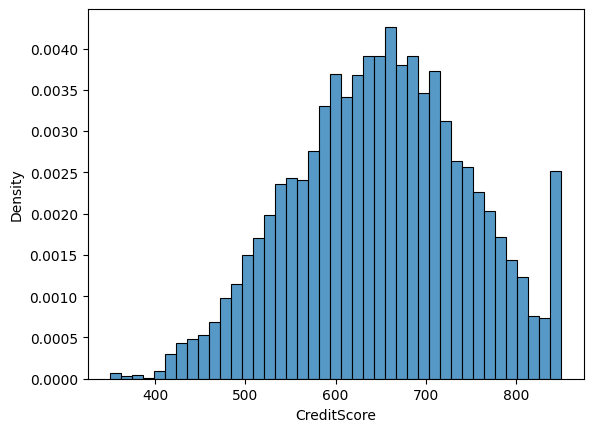

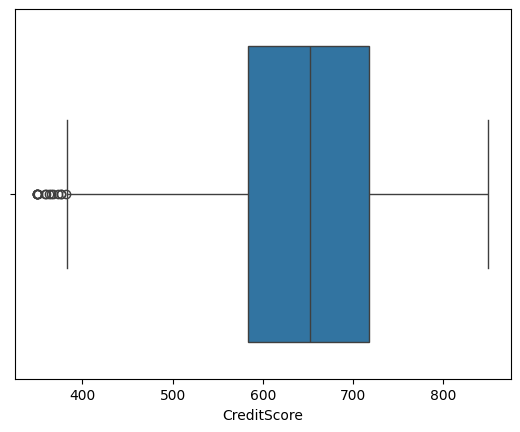

In [40]:
sns.histplot(data=data,x='CreditScore',stat='density')
plt.show()
sns.boxplot(data=data,x='CreditScore')
plt.show()

- The distribution is slightly left skewed.
- There are a small number of outliers


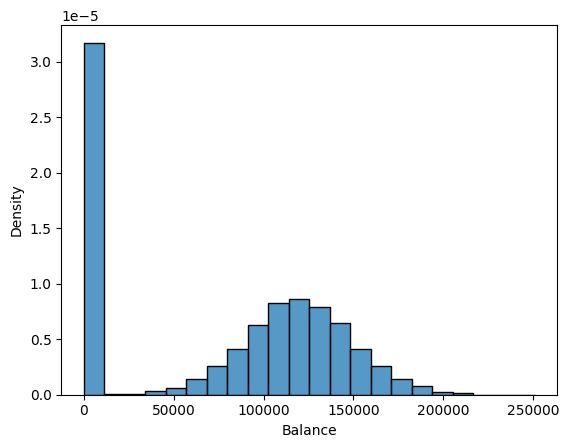

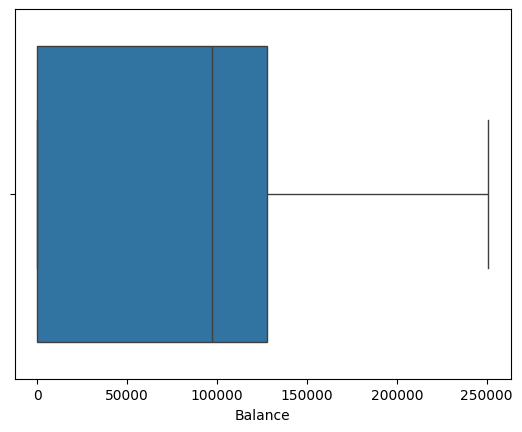

In [13]:
sns.histplot(data=data,x='Balance',stat='density')
plt.show()
sns.boxplot(data=data,x='Balance')
plt.show()

- The balance is evenly distributed outside the users with zero balance.
- Users with zero balance represents the highest occurance

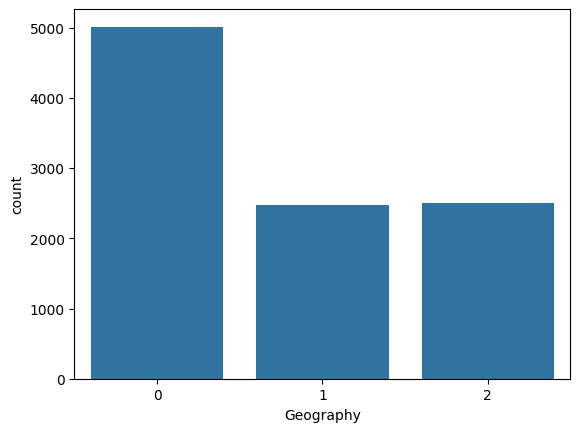

In [41]:
#countplot for the geography
sns.countplot(data=data,x='Geography')
plt.show()

- About 40% of customers live in France, with the remaining 60% split between Germany and Spain

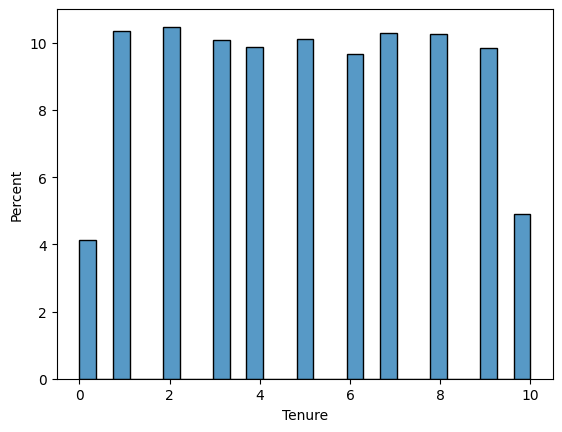

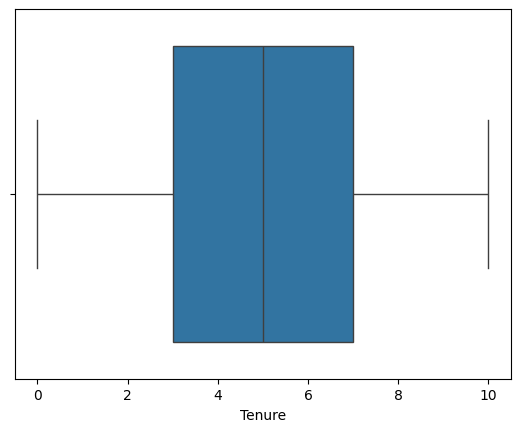

In [15]:
sns.histplot(data=data,x='Tenure',stat="percent")
plt.show()
sns.boxplot(data=data,x='Tenure')
plt.show()

#show the distribution curve


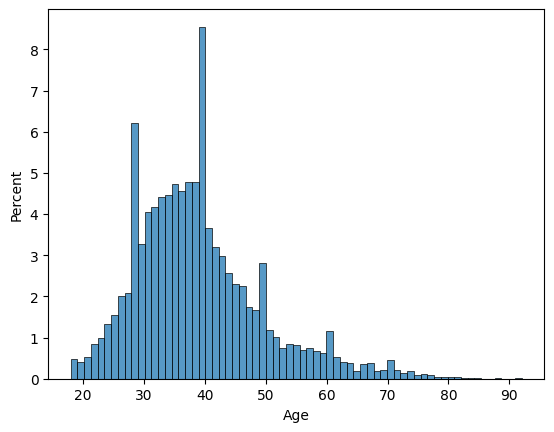

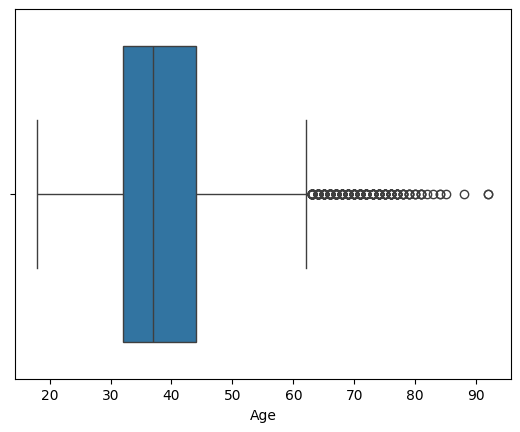

In [16]:
#show the distribution of age
sns.histplot(data=data,x='Age',stat="percent")
plt.show()
sns.boxplot(data=data,x='Age')
plt.show()

- There is a long tail for the customer age

### Bivariate Analysis

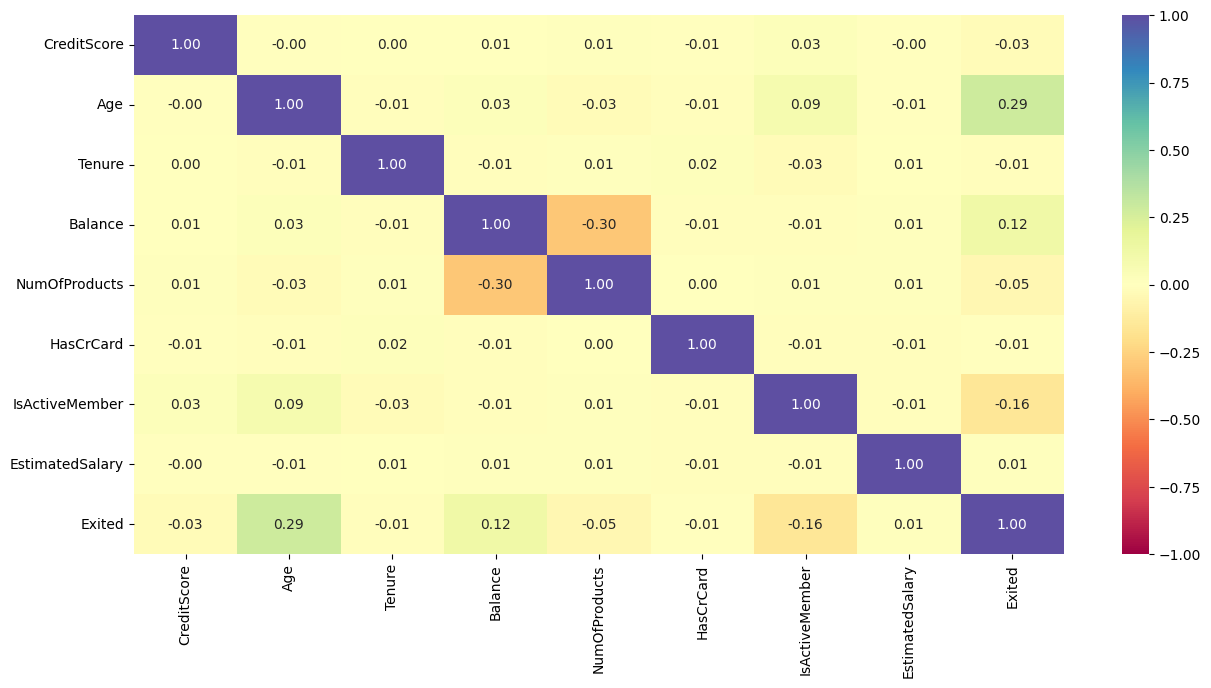

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_features].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations from the heatmap:
- Age has the highest correlation of whether the customer exits. Simply put, older customers are more likely to churn.
- Balance is the next highest correlation. Those with higher balances are more likely to churn.
- Number of products is the highest inverse correlation, meaning more products equals less a chance of churn.

<Figure size 1200x800 with 0 Axes>

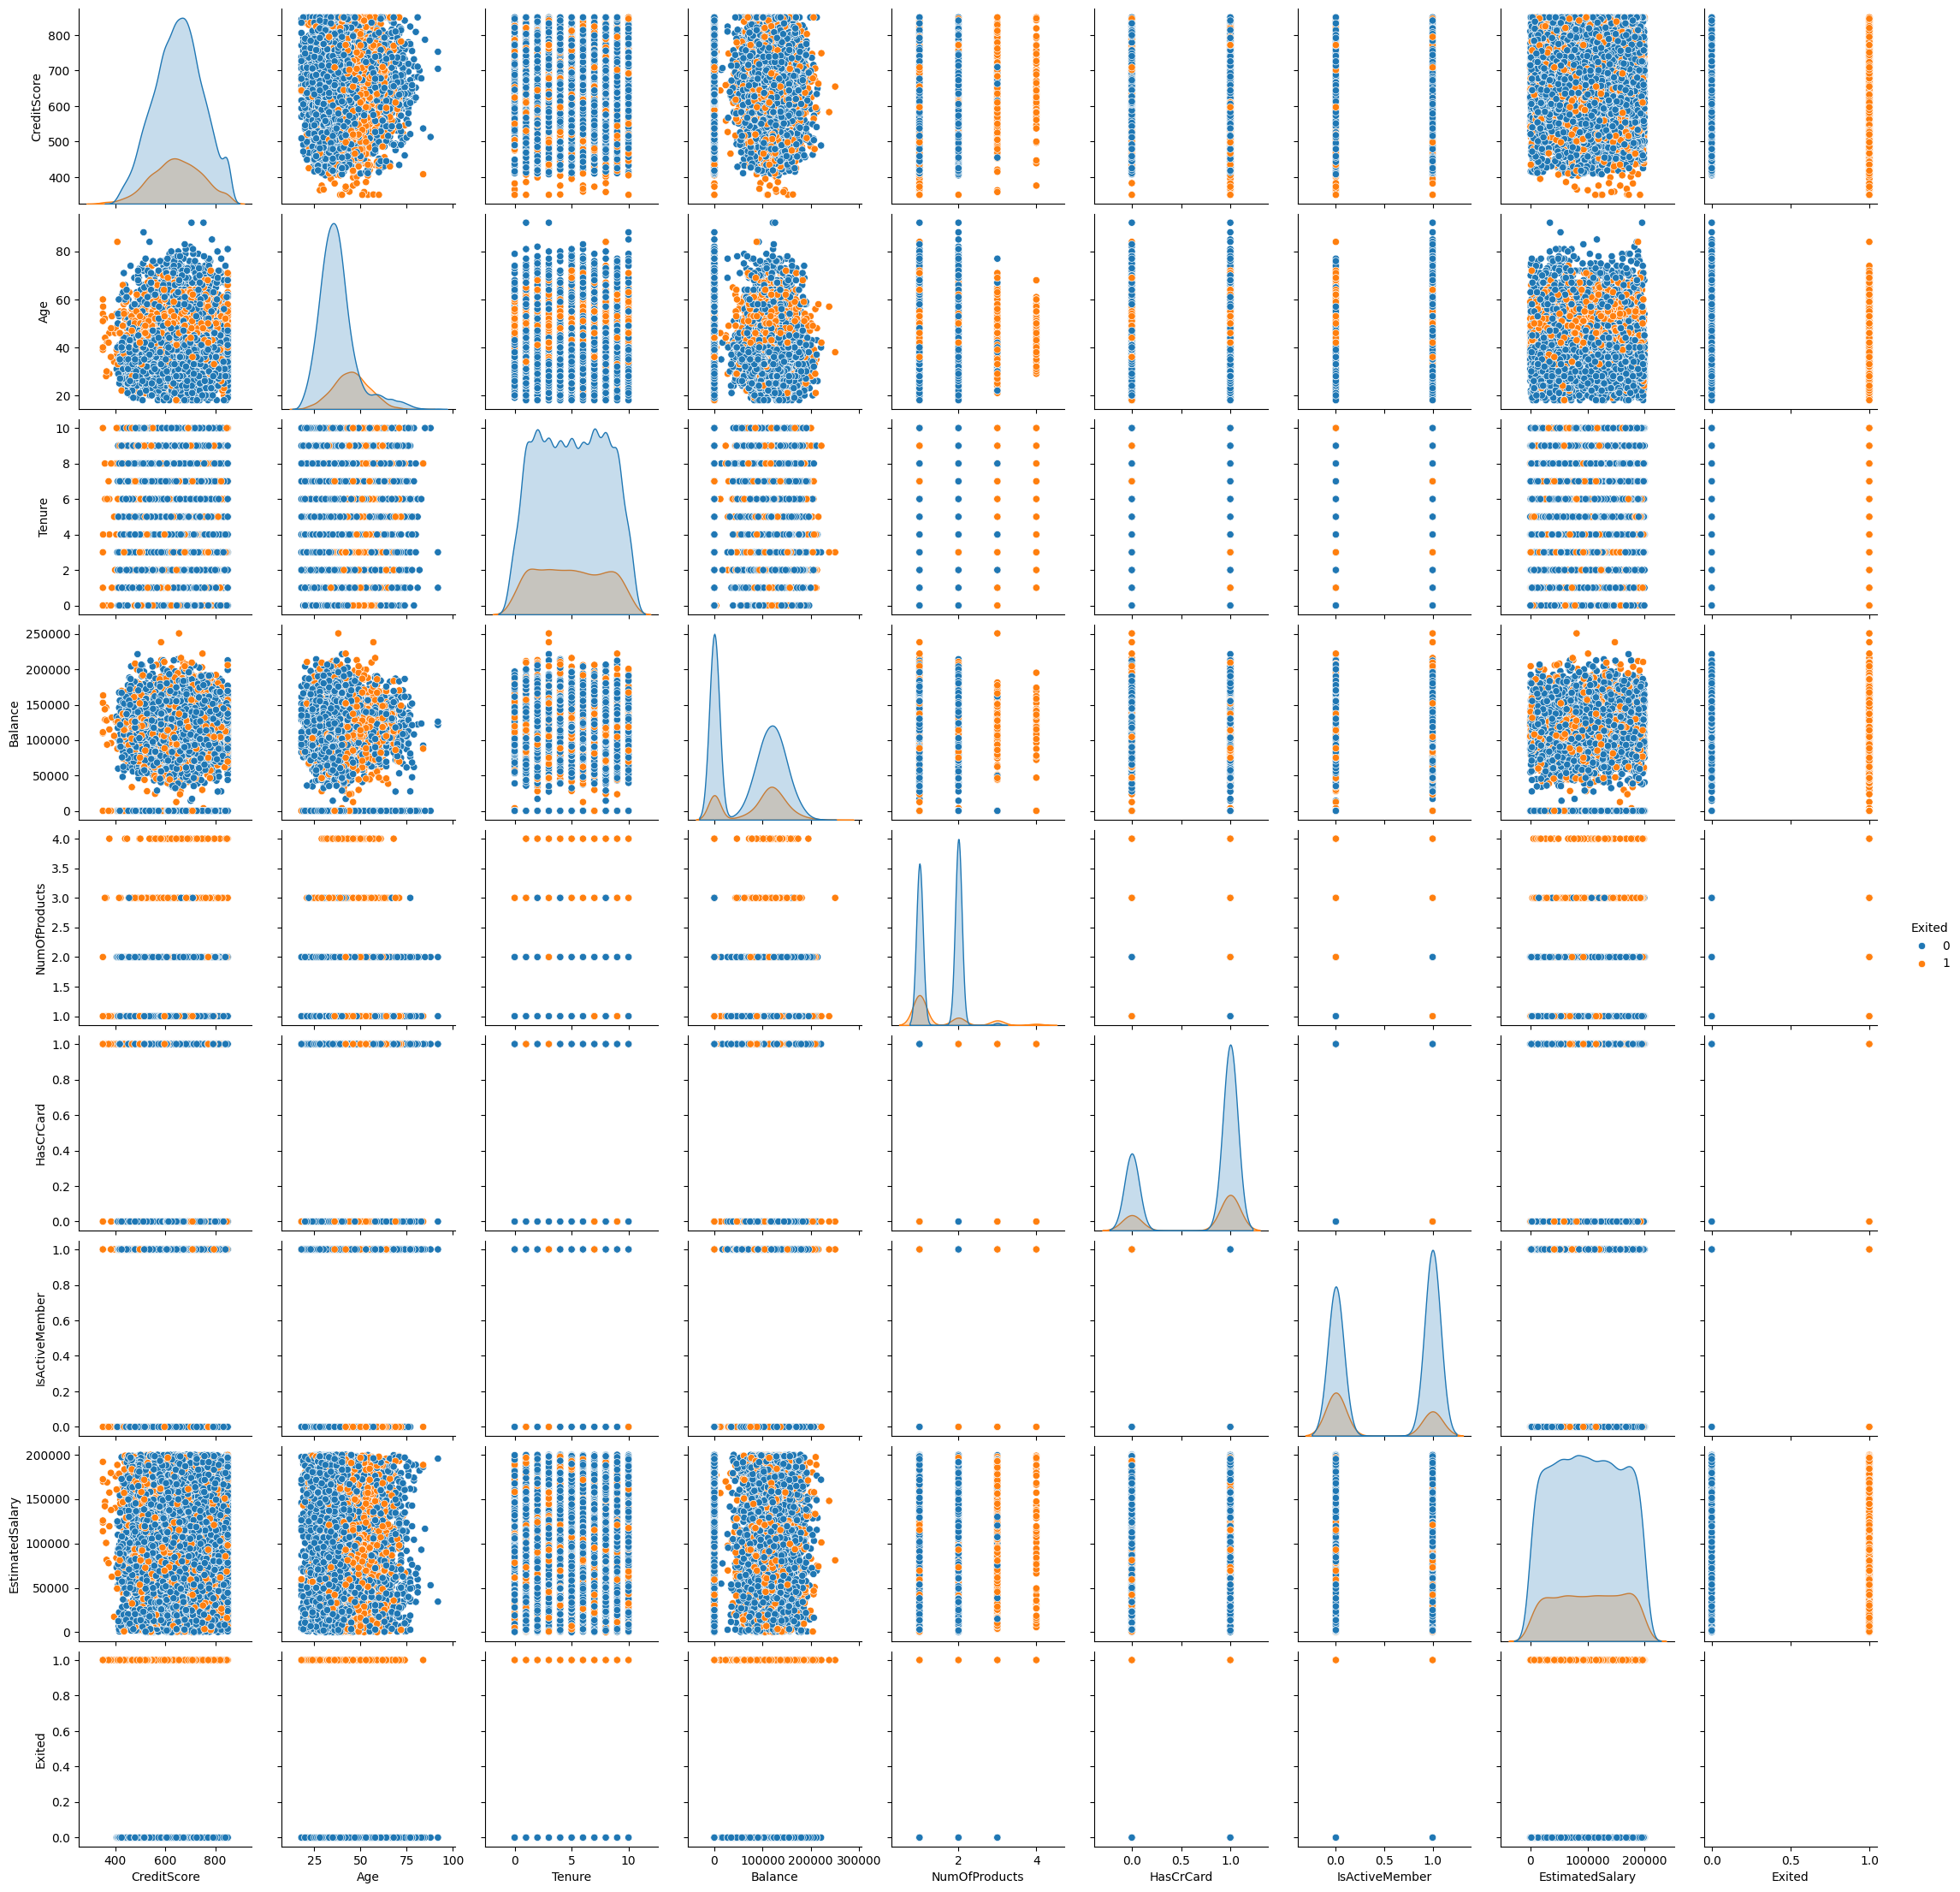

In [17]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=num_features, hue='Exited', diag_kind='kde');

Observations from pairplot
- Users with a credit score of leass than 500 are morelikely to churn
- Younger users are more likey to churn
- Customers with balances below 45000 are more likely to churn

## Data Preprocessing

### Dummy Variable Creation

### Train-validation-test Split

### Data Normalization

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


### Neural Network with SGD Optimizer

## Model Performance Improvement

### Neural Network with Adam Optimizer

### Neural Network with Adam Optimizer and Dropout

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___